# Tensorboard 그리기
- logging directory 생성!
- Model Checkpoint!

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

NameError: ignored

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])

In [ ]:
# 시간정보를 활용하여 폴더 생성
import datetime

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.fit(x_train, y_train,
            validation_data=(x_test, y_test),
            epochs=10,
            callbacks=[tensorboard_callback],
            )

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4903 - acc: 0.8235 - val_loss: 0.4286 - val_acc: 0.8448
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3697 - acc: 0.8652 - val_loss: 0.3586 - val_acc: 0.8705
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3339 - acc: 0.8778 - val_loss: 0.3685 - val_acc: 0.8693
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3088 - acc: 0.8853 - val_loss: 0.3670 - val_acc: 0.8691
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2936 - acc: 0.8915 - val_loss: 0.3497 - val_acc: 0.8765
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2766 - acc: 0.8964 - val_loss: 0.3460 - val_acc: 0.8738
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2616 - acc: 0.9011 - val_loss: 0.3438 - val_acc: 0.8823
Epoch 8/10
1875/1875 [==========================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {log_dir}

<IPython.core.display.Javascript object>

# Cifar-10 데이터셋으로 분류모형 생성
- MLP 생성
- 실제 사진에 적용
- test-car.jpg를 업로드해서 분류
- 구글 등에서 자동차, 배, 비행기 사진을 jpg로 다운로드하셔서 적용

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
y_train.shape

(50000, 1)

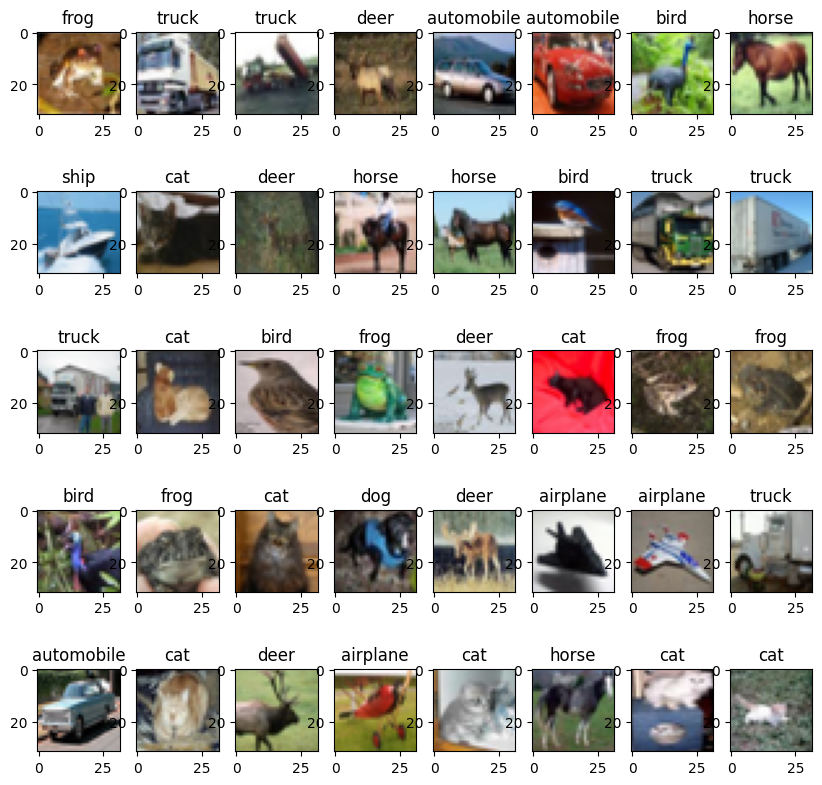

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

#합성, rotate, 뒤집기, resize

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)

plt.show()

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 1차원 배열로 변환하기 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train.shape

(50000, 3072)

In [ ]:
# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_data=(X_test, y_test))



Epoch 1/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.9025 - accuracy: 0.3052 - val_loss: 1.7781 - val_accuracy: 0.3485
Epoch 2/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.7056 - accuracy: 0.3868 - val_loss: 1.6223 - val_accuracy: 0.4236
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.6192 - accuracy: 0.4196 - val_loss: 1.5967 - val_accuracy: 0.4248
Epoch 4/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5614 - accuracy: 0.4401 - val_loss: 1.5537 - val_accuracy: 0.4566
Epoch 5/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5159 - accuracy: 0.4555 - val_loss: 1.5194 - val_accuracy: 0.4577


In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


313/313 [==============================] - 3s 10ms/step - loss: 1.5194 - accuracy: 0.4577
정답률= 0.4577000141143799 loss= 1.5193644762039185


In [ ]:
hist.history

{'loss': [1.9025243520736694,
  1.7056198120117188,
  1.619185209274292,
  1.5613675117492676,
  1.515850305557251],
 'accuracy': [0.30522000789642334,
  0.38679999113082886,
  0.4196400046348572,
  0.4401400089263916,
  0.4554600119590759],
 'val_loss': [1.7781363725662231,
  1.6222825050354004,
  1.5966579914093018,
  1.5537331104278564,
  1.5193644762039185],
 'val_accuracy': [0.34850001335144043,
  0.4235999882221222,
  0.42480000853538513,
  0.45660001039505005,
  0.4577000141143799]}

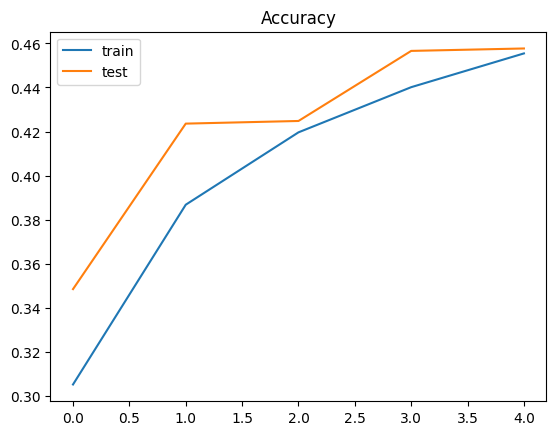

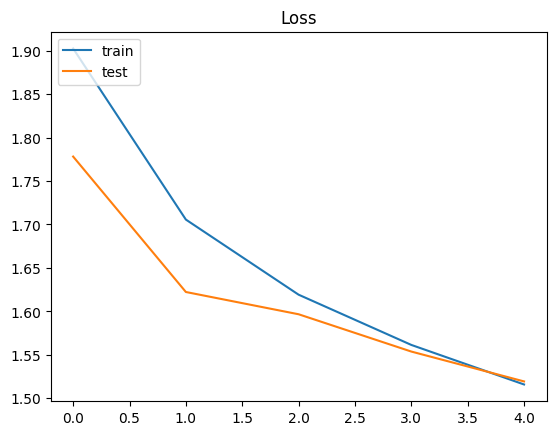

In [ ]:
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 모형 저장: 가중치의 저장

In [ ]:
model.save_weights('cifar10-weight.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 3,746,122
Trainable params: 3,746,122
Non-trainable params: 0
_________________________________________________________________


# 실제 사진에의 적용

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('download.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

error: ignored

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

In [ ]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 결과 → 2
print(np.array([1, 3, 2, 9]).argmax()) # 결과 → 3
print(np.array([9, 0, 2, 3]).argmax()) # 결과 → 0

# 실습
- 위의 모형의 은닉층 구조를 변경하여 모형을 개선해보세요.
- epoch의 수를 늘려서 테스트해보세요
- 예제 파일인 test-car.jpg 대신, 위 데이터셋의 범주에 해당하는 다른 이미지를 넣어서 테스트해보세요.

In [ ]:
#fashion_mnist 자료를 이용해서 DNN을 만들어보자
#validation 만들지말고 tr, te만 만들기
#네트워크 구성하기
#X의 MinMaxScaling, y는 OHE
#X는 3d -> 2d reshape
# fit: batch_size, epochs, validation_split=0.1
#test에 대한 성능 classification_report